[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/)
- Click "Upload" and select this file and the data file.

# Drug: Decision Trees

Build a decision trees classification algorithm on the patients data and their response to different medications. Then, use the trained model to predict the best drug for a new patient.
- The data consists of a set of patients who suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, B, C, X, and Y.
- Features: Age, Gender, Blood pressure, Cholesterol, and Na to K ratio of the patients
    - Na to K ratio: The sodium potassium ratio is the amount of sodium divided by the amount of potassium. Its measurement in urine is a measure of dietary intake and chronic disease risk.
- Target: Drug types A, B, C, X, Y (multiclass)

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

### Prepare data

In [2]:
# Read the data

df = pd.read_csv("Drug.csv")
df.head()

,Drug,Age,Gender,BP,Cholesterol,Na_K
0,drugY,23,F,high,high,25.355
1,drugC,47,M,low,high,13.093
2,drugC,47,M,low,high,10.114
3,drugX,28,F,normal,high,7.798
4,drugY,61,F,low,high,18.043


In [3]:
# size of data

df.shape

(200, 6)

* `df.shape`: output is a tuple (rows, columns) in the dataframe.

In [4]:
# Display unique categories in each variable

print(df.Drug.unique())
print(df.BP.unique())
print(df.Cholesterol.unique())

['drugY' 'drugC' 'drugX' 'drugA' 'drugB']
['high' 'low' 'normal']
['high' 'normal']


* `unique()`: Returns an array or list containing only the unique values from the original data, removing any duplicates.

In [5]:
# Create dummies from the categorical variables

df = pd.get_dummies(df, columns=['Gender', 'BP', 'Cholesterol'], drop_first=True)
df.head()

,Drug,Age,Na_K,Gender_M,BP_low,BP_normal,Cholesterol_normal
0,drugY,23,25.355,0,0,0,0
1,drugC,47,13.093,1,1,0,0
2,drugC,47,10.114,1,1,0,0
3,drugX,28,7.798,0,0,1,0
4,drugY,61,18.043,0,1,0,0


* `get_dummies`: Creates new binary (0 or 1) columns for categorical variables
* `drop_first`: prevents multicollinearity by omitting one of the binary columns per categorical variable.

In [6]:
# Rename columns

df.rename(columns={'Gender_M': 'Male', 'Cholesterol_normal': 'Chol_normal'}, inplace=True)
df.head()

,Drug,Age,Na_K,Male,BP_low,BP_normal,Chol_normal
0,drugY,23,25.355,0,0,0,0
1,drugC,47,13.093,1,1,0,0
2,drugC,47,10.114,1,1,0,0
3,drugX,28,7.798,0,0,1,0
4,drugY,61,18.043,0,1,0,0


* `rename()`: Renames specific columns in the DataFrame df.
* `inplace`: Ensures that changes are applied to the original DataFrame.

In [7]:
# Define x and y

y=df.Drug
x=df[['Age', 'Na_K', 'Male', 'BP_low', 'BP_normal', 'Chol_normal']]

In [8]:
# train, test split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=1)

* `train_test_split()`: Divide the dataset into subsets for training and evaluation
    - xtrain and ytrain are used for training a model
    - xtest and ytest are reserved for evaluating the model's performance on unseen data
* `random_state`: Used to control the randomness to ensure reproducibility. It allows you to get the same results when running your code multiple times, as long as you use the same value for random_state.

### Model

In [9]:
#  Define and fit a decision tree model on the data

m = DecisionTreeClassifier(criterion="entropy", max_depth=5)
m.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

- `max_depth`: the maximum depth of the decision tree
- `criterion="entropy"`: To see the information gain of each node
    - Entropy measures the impurity or disorder and used to evaluate the quality of a split in a decision tree.

### Evaluation

In [10]:
# Predict the target in the test data and display accuracy rate

pred = m.predict(xtest)
print("Accuracy: ", metrics.accuracy_score(ytest, pred))

Accuracy:  1.0


* `predict`: Trained model m is used to predict the target variable on the test data (xtest).
* `metric.accuracy_score`: calculates the accuracy of the predicted compared to the actual target values (ytest).

### Visualization
- Uncomment and install the pydotplus and graphviz libraries if you haven't.

In [11]:
# conda update -n base -c defaults conda
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

In [12]:
dot = StringIO()
file = "drugtree.png"
feature = df.columns[1:]
out=tree.export_graphviz(m, feature_names=feature, out_file=dot, class_names= np.unique(ytrain), filled=True)
gr = pydotplus.graph_from_dot_data(dot.getvalue())
gr.write_png(file)
img = mpimg.imread(file)

- `dot = StringIO()`: Create a new instance of the `StringIO` class to store the DOT data of the decision tree visualization.
- `file = "drugtree.png"`: Save the exported tree image
- `feature = df.columns[1:]`: Assign the variable `feature` to a list of column names from the DataFrame `df`, starting from the second column.
- `out = tree.export_graphviz()`: Create DOT data for the decision tree visualization. The result of `export_graphviz` is stored in the `out` variable.
    - `m`: The trained decision tree classifier.
    - `feature_names`: A list of feature names to be displayed in the tree nodes.
    - `out_file`: The file-like object (`dot`) where the DOT data will be written.
    - `class_names`: Label the different classes in the tree.
    - `filled`: If `True`, the nodes is colored based on class distribution.
    - `rotate`: If `True`, the tree will be drawn horizontally.
- `pydotplus.graph_from_dot_data(dot.getvalue())`: Uses the `pydotplus` library to create a graph from the DOT data stored in the `dot` StringIO object.
- `gr.write_png(file)`: Write the graph to the PNG file
- `mpimg.imread(file)`: Read the saved image file

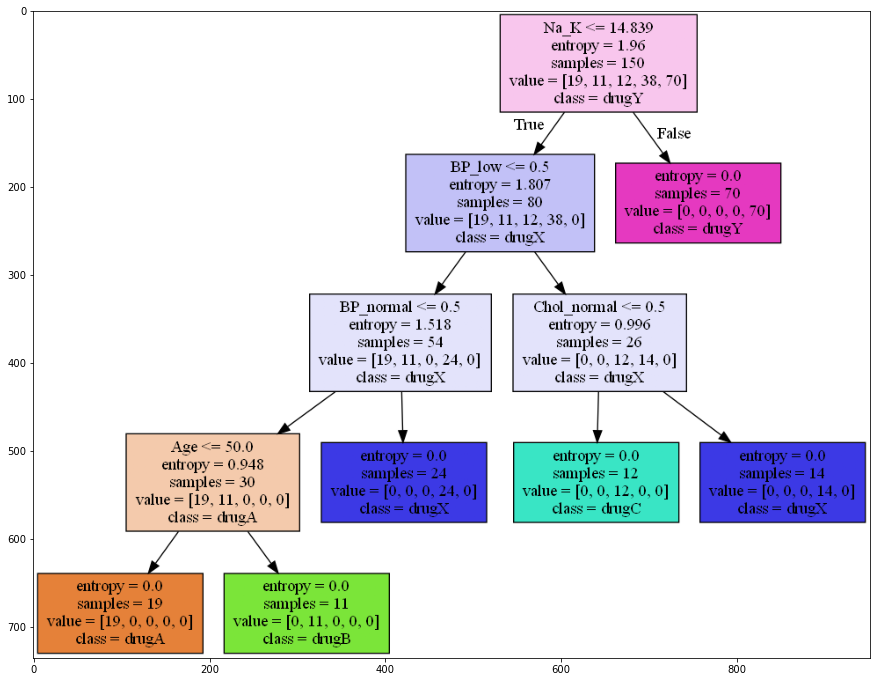

In [13]:
# Display the image (`img`)

plt.figure(figsize=(15, 25))
plt.imshow(img)

* The depth of the tree is 4 (we set max_depth=5). Only 5 out of 6 variables are used to achieve 100% accuracy.
* `plt.figure()`: Creates a new empty Matplotlib figure for plotting.
    - `figsize`: specifies the dimensions of a figure in inches (width, height)
* `plt.imgshow()`: Display images or arrays as visual plots.

### Interpretation of the decision tree
- **Node 0 (Root Node)** splits the data based on `Na_K`.
    - If an observation has a `Na_K` value less than or equal to 14.8, it goes to the left child; otherwise, it goes to the right.
    - The entropy value indicates a high level of impurity
        - Entropy ranges from 0 to log2(⁡𝑁). Here, we have 5 classes, so log2(5)=2.32
    - The number of samples in this nobe is 150.
    - The `value` distribution shows the number of samples that fall into each class for this node. Here, the dominant class is `drugY`.
- **Node 1** further splits the data from the parent node (Node 0) based on the BP_normal.
    - Observations with BP_normal less than or equal to 50% go to the left child; otherwise, they go to the right.
    - The entropy value here is less than the root node, indicating that this split made the data more homogeneous.
    - The dominant class for this node is `drugX`.